## Digital Image Processing Exercise 1_1

Amirkabir University of Technology

Dr. Rahmati 

By Gholamrezadar 400131018

In [1]:
import numpy as np
import cv2
import os
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()
sns.set_style("dark")


## Useful Functions

In [2]:
def load_images_from_folder(folder):
    images = []
    names = []
    for filename in os.listdir(folder):
        img = cv2.imread(os.path.join(folder,filename))
        if img is not None:
            images.append(img)
            names.append(filename.split('.')[0])
    return images, names

In [3]:
def image_mirror(image):
    temp = image.copy()
    for i in range(image.shape[0]):
        for j in range(image.shape[1]):
            temp[i,j] = image[i,image.shape[1]-j-1]
    return temp

In [4]:
def make_symmetric_images(image):
    L = image[:,:image.shape[1]//2,:]
    R = image[:,image.shape[1]//2:,:]
    LL = np.concatenate((L,image_mirror(L)),axis=1)
    RR = np.concatenate((image_mirror(R), R),axis=1)
    RL = np.concatenate((image_mirror(R), image_mirror(L)),axis=1)
    return LL, RR, RL

In [5]:
def PSNR(img, ref):
    return 20 * np.log10(255.0 / np.sqrt(np.mean((img - ref) ** 2)))

In [6]:
def SSIM(img, ref):
    C1 = (0.01 * 255)**2
    C2 = (0.03 * 255)**2

    img = img.astype(np.float64)
    ref = ref.astype(np.float64)
    kernel = cv2.getGaussianKernel(11, 1.5)
    window = np.outer(kernel, kernel.transpose())

    mu1 = cv2.filter2D(img, -1, window)[5:-5, 5:-5]
    mu2 = cv2.filter2D(ref, -1, window)[5:-5, 5:-5]
    mu1_sq = mu1**2
    mu2_sq = mu2**2
    mu1_mu2 = mu1 * mu2
    sigma1_sq = cv2.filter2D(img**2, -1, window)[5:-5, 5:-5] - mu1_sq
    sigma2_sq = cv2.filter2D(ref**2, -1, window)[5:-5, 5:-5] - mu2_sq
    sigma12 = cv2.filter2D(img * ref, -1, window)[5:-5, 5:-5] - mu1_mu2

    ssim_map = ((2 * mu1_mu2 + C1) * (2 * sigma12 + C2)) / ((mu1_sq + mu2_sq + C1) * (sigma1_sq + sigma2_sq + C2))
    
    return round(ssim_map.mean(), 2)

In [7]:
def display_image(image):
    img_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    plt.imshow(img_rgb)
    plt.axis('off')
    plt.show()

## Load Images

In [8]:
images_list, names = load_images_from_folder('inputs/P1/')
len(images_list)

10

In [9]:
for i in range(len(images_list)):
    # If odd columns
    if images_list[i].shape[1]%2 == 1:
        images_list[i] = images_list[i][:,:-1,:]
    print(images_list[i].shape)

(605, 532, 3)
(605, 532, 3)
(605, 532, 3)
(605, 532, 3)
(605, 532, 3)
(605, 532, 3)
(605, 532, 3)
(605, 532, 3)
(605, 532, 3)
(605, 532, 3)


In [10]:
names

['cristiano_ronaldo',
 'erling_haaland',
 'harry_kane',
 'jose_mourinho',
 'jurgen_klopp',
 'kevin_de_bruyne',
 'lionel_messi',
 'ngolo_kante',
 'pep_guardiola',
 'zlatan_ibrahimovic']

## Faces

### Half faces

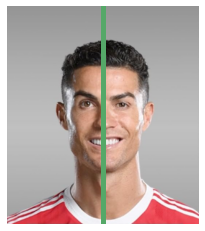

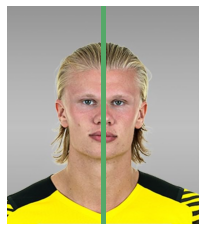

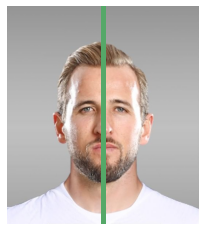

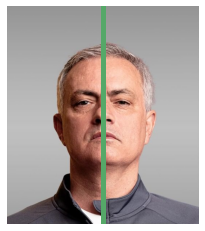

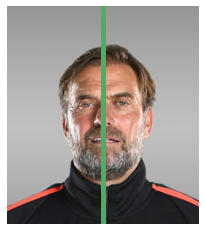

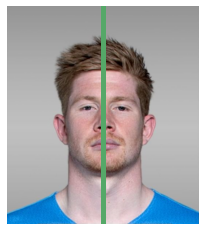

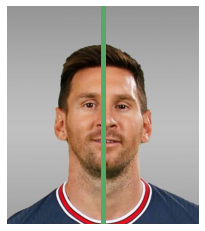

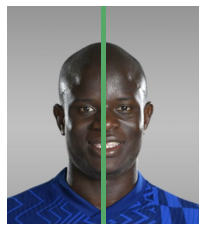

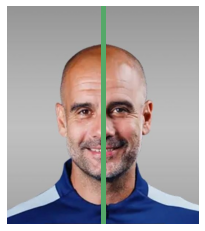

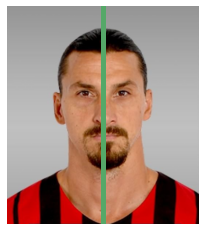

In [11]:
for i in range(len(images_list)):
    img_rgb = cv2.cvtColor(images_list[i], cv2.COLOR_BGR2RGB)
    plt.imshow(img_rgb)
    plt.axvline(x=img_rgb.shape[1]/2, ymin=0, ymax=img_rgb.shape[0], color='g', linewidth=5)
    plt.axis('off')
    plt.show()

### Full faces

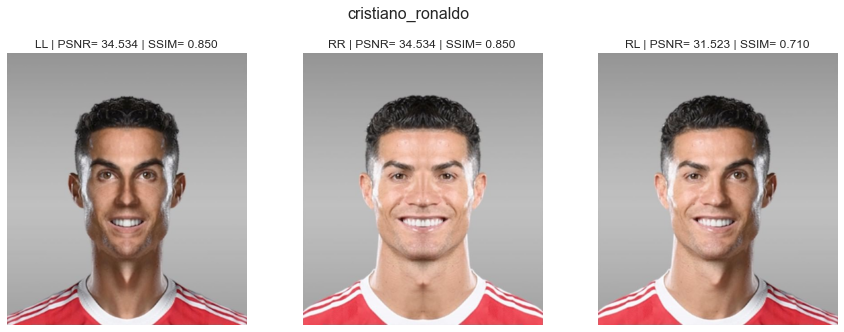

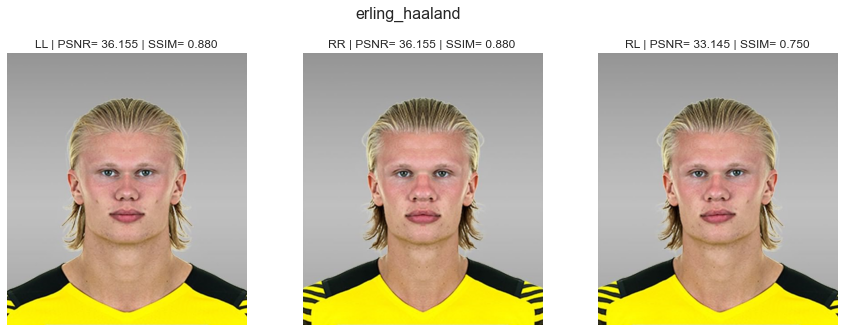

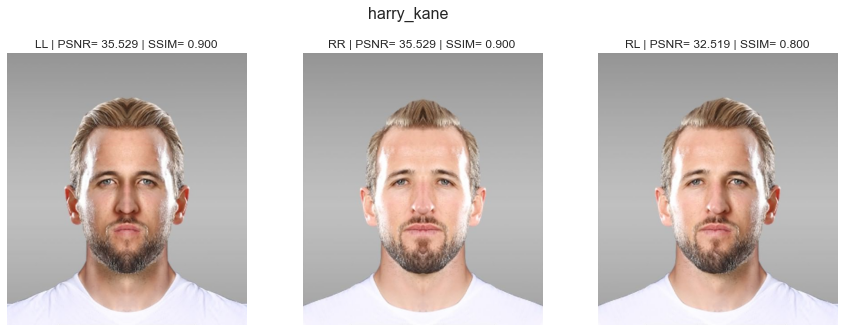

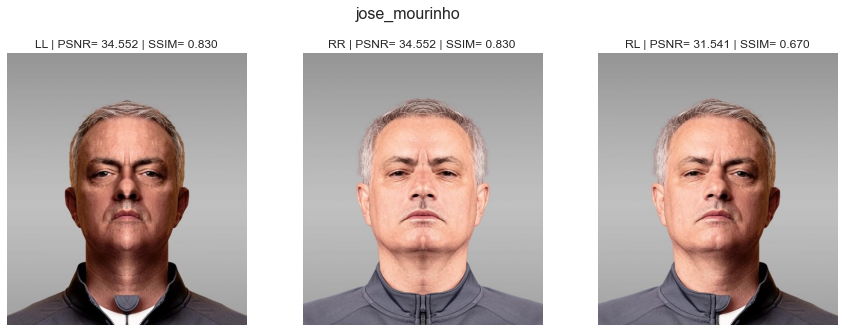

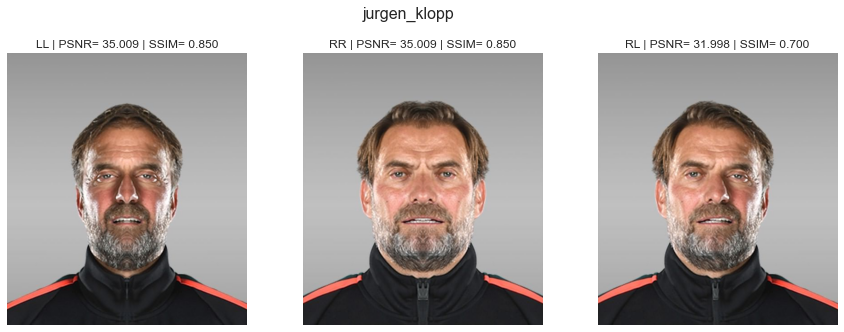

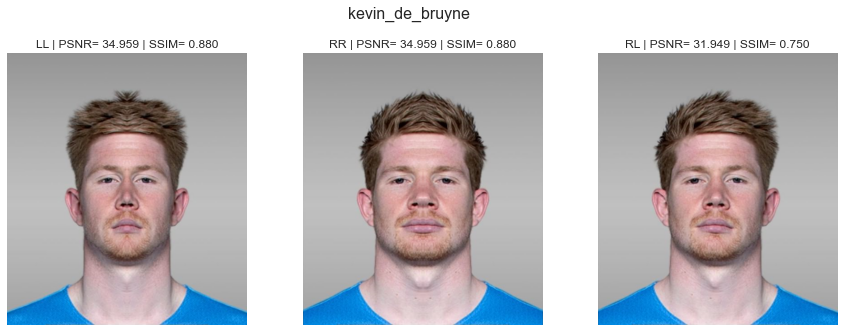

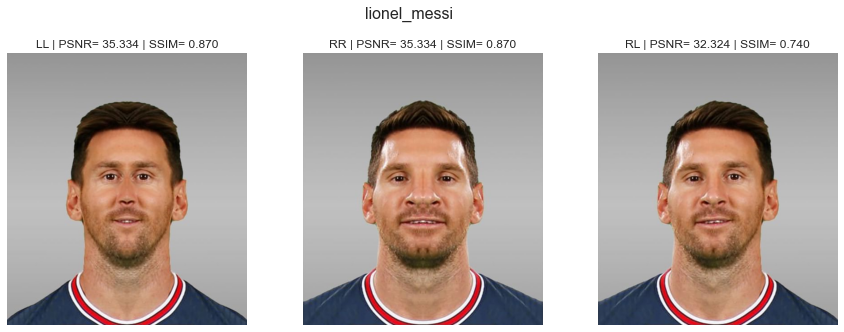

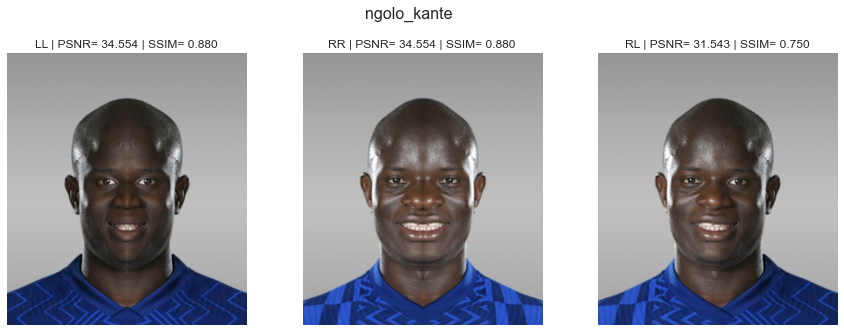

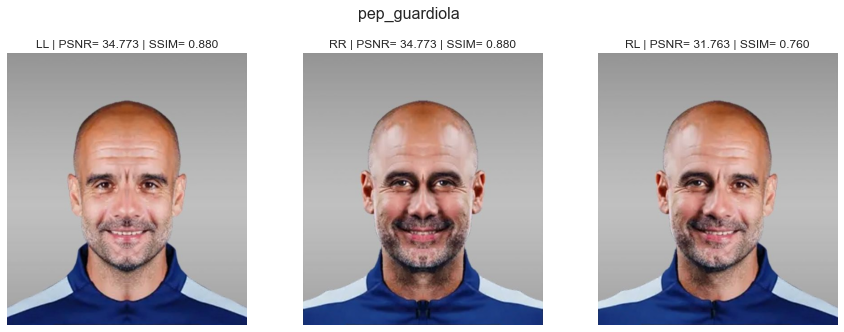

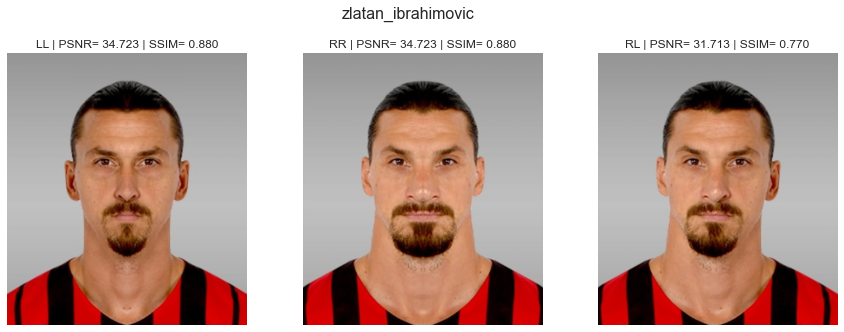

In [13]:
psnr_list = []
ssim_list = []

# For every photo
for i in range(len(images_list)):
    # Make symmetric images
    LL, RR, RL = make_symmetric_images(images_list[i])

    fig, axs = plt.subplots(1,3,figsize=(15,5))
    fig.suptitle(names[i], fontsize=16, y=1.01)
    
    # Display LL and report PSNR and SSIM
    LL_rgb = cv2.cvtColor(LL, cv2.COLOR_BGR2RGB)
    axs[0].set_title(f'LL | PSNR= {PSNR(LL, images_list[i]):.3f} | SSIM= {SSIM(LL, images_list[i]):.3f}')
    axs[0].imshow(LL_rgb)
    axs[0].axis('off')

    # Display RR and report PSNR and SSIM
    # RR[:100, :100, :] = 0
    RR_rgb = cv2.cvtColor(RR, cv2.COLOR_BGR2RGB)
    axs[1].set_title(f'RR | PSNR= {PSNR(RR, images_list[i]):.3f} | SSIM= {SSIM(RR, images_list[i]):.3f}')
    axs[1].imshow(RR_rgb)
    axs[1].axis('off')

    # Display RL and report PSNR and SSIM
    RL_rgb = cv2.cvtColor(RL, cv2.COLOR_BGR2RGB)
    axs[2].set_title(f'RL | PSNR= {PSNR(RL, images_list[i]):.3f} | SSIM= {SSIM(RL, images_list[i]):.3f}')
    axs[2].imshow(RL_rgb)
    axs[2].axis('off')

    psnr_list.append((PSNR(LL, images_list[i]), PSNR(RR, images_list[i]), PSNR(RL, images_list[i])))
    ssim_list.append((SSIM(LL, images_list[i]), SSIM(RR, images_list[i]), SSIM(RL, images_list[i])))

    plt.show()